In [1]:
with open("../Data/cervantes_2.txt", "r", encoding="utf-8") as file:
    text = file.read()

with open("../Data/shakespeare.txt", "r", encoding="utf-8") as file:
    text = file.read()


In [13]:
text= text[:10000]

In [14]:
print(text[:1000])

  From fairest creatures we desire increase,
  That thereby beauty's rose might never die,
  But as the riper should by time decease,
  His tender heir might bear his memory:
  But thou contracted to thine own bright eyes,
  Feed'st thy light's flame with self-substantial fuel,
  Making a famine where abundance lies,
  Thy self thy foe, to thy sweet self too cruel:
  Thou that art now the world's fresh ornament,
  And only herald to the gaudy spring,
  Within thine own bud buriest thy content,
  And tender churl mak'st waste in niggarding:
    Pity the world, or else this glutton be,
    To eat the world's due, by the grave and thee.


                     2
  When forty winters shall besiege thy brow,
  And dig deep trenches in thy beauty's field,
  Thy youth's proud livery so gazed on now,
  Will be a tattered weed of small worth held:
  Then being asked, where all thy beauty lies,
  Where all the treasure of thy lusty days;
  To say within thine own deep sunken eyes,
  Were an all-e

[('and', 47), ('thou', 46), ('the', 45), ('thy', 38), ('to', 36), ('in', 33), ('that', 31), ('of', 29), ('thee', 20), ('beauty', 19)]


[nltk_data] Downloading package punkt to /home/robert/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


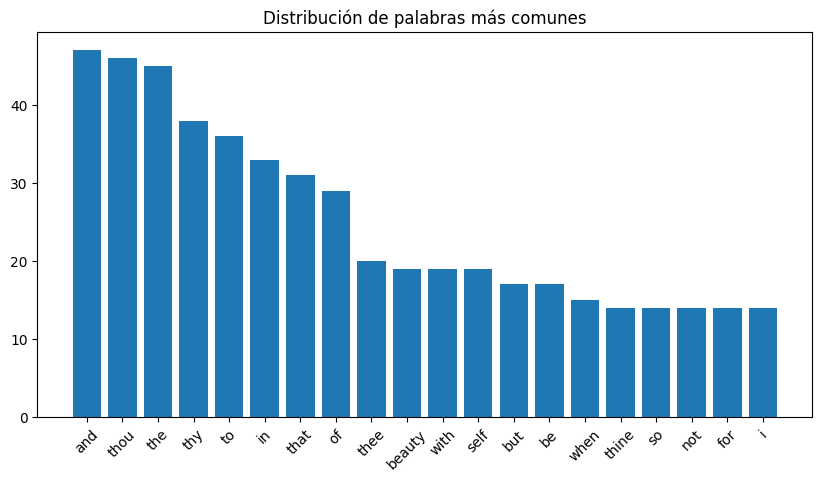

In [15]:
import nltk
from collections import Counter
import matplotlib.pyplot as plt

# Asegúrate de tener los recursos de NLTK
nltk.download("punkt")

# Tokenizar palabras
words = nltk.word_tokenize(text.lower())

# Filtrar solo palabras alfabéticas
words = [w for w in words if w.isalpha()]

# Contar frecuencia de palabras
word_freq = Counter(words)

# Mostrar las 10 más comunes
print(word_freq.most_common(10))

# Graficar distribución de las 20 más comunes
common_words = word_freq.most_common(20)
labels, counts = zip(*common_words)

plt.figure(figsize=(10,5))
plt.bar(labels, counts)
plt.title("Distribución de palabras más comunes")
plt.xticks(rotation=45)
plt.show()


[('thou', 46), ('thy', 38), ('thee', 20), ('beauty', 19), ('self', 19), ('thine', 14), ('world', 10), ('time', 9), ('art', 9), ('sweet', 8)]


[nltk_data] Downloading package punkt to /home/robert/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/robert/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


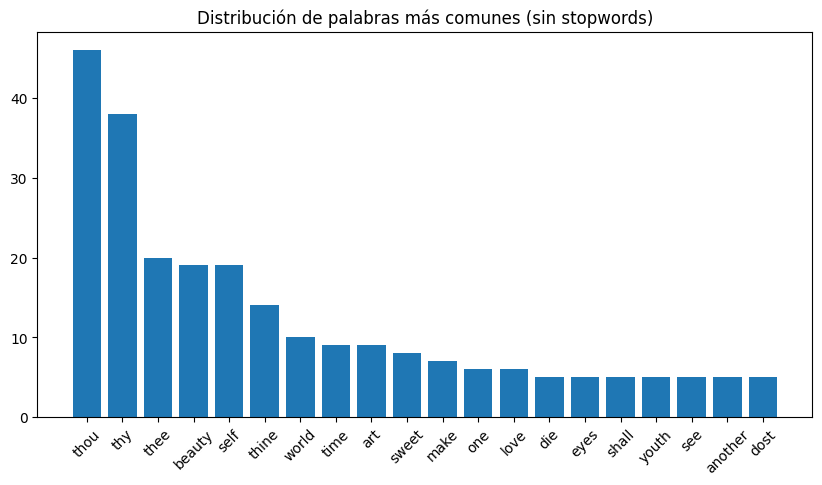

In [16]:
import nltk
from collections import Counter
import matplotlib.pyplot as plt

# Descargar recursos de NLTK (solo la primera vez)
nltk.download("punkt")
nltk.download("stopwords")

from nltk.corpus import stopwords

# Stopwords en español
#stop_words = set(stopwords.words("spanish"))
stop_words = set(stopwords.words("english"))

# Tokenizar
words = nltk.word_tokenize(text.lower())

# Filtrar solo palabras alfabéticas y que no sean stopwords
words = [w for w in words if w.isalpha() and w not in stop_words]

# Contar frecuencias
word_freq = Counter(words)

# Mostrar las 10 más comunes
print(word_freq.most_common(10))

# Graficar distribución de las 20 más comunes
common_words = word_freq.most_common(20)
labels, counts = zip(*common_words)

plt.figure(figsize=(10,5))
plt.bar(labels, counts)
plt.title("Distribución de palabras más comunes (sin stopwords)")
plt.xticks(rotation=45)
plt.show()


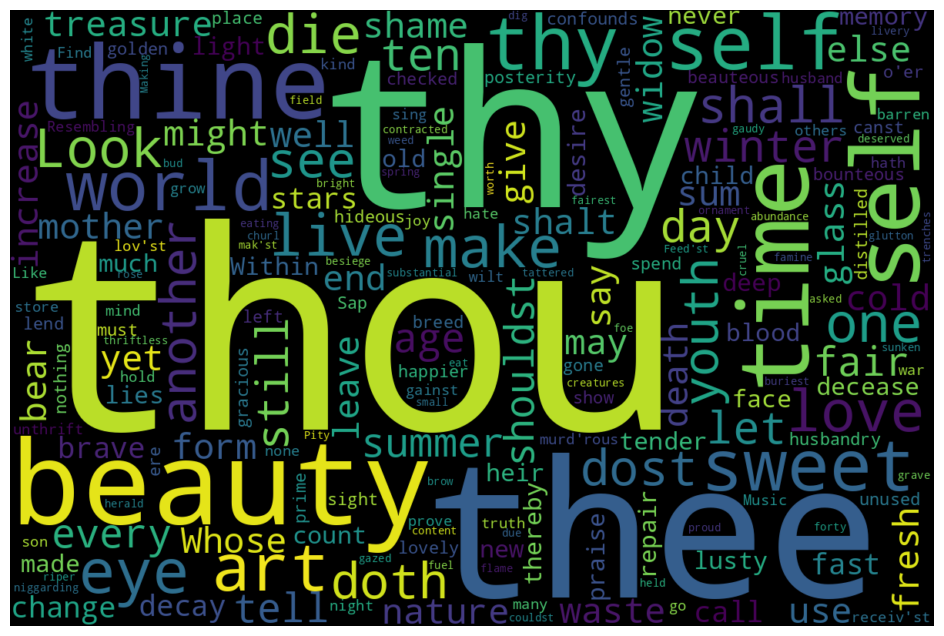

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk





# Generar nube de palabras
wordcloud = WordCloud(
    width=1200,
    height=800,
    background_color="black",
    stopwords=stop_words,
    colormap="viridis"
).generate(text)

# Mostrar nube
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


[('thou', 47), ('thy', 38), ('self', 24), ('beauty', 20), ('thee', 20), ('thine', 14), ('time', 13), ('sweet', 11), ('world', 10), ('art', 9)]


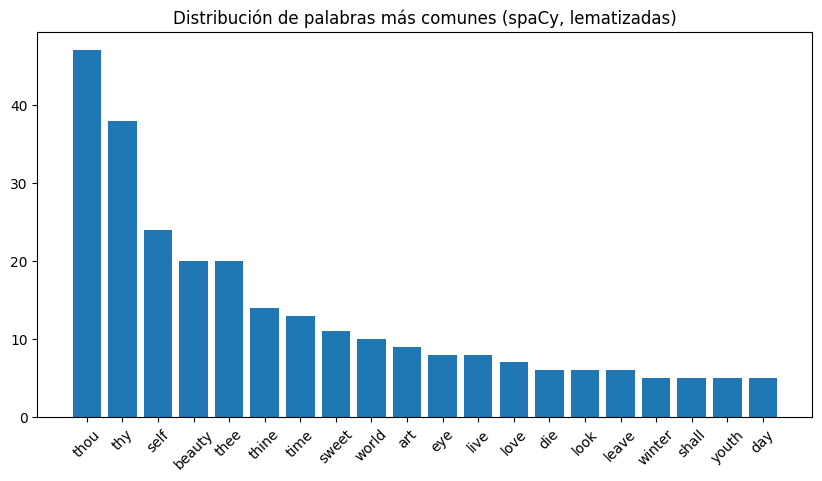

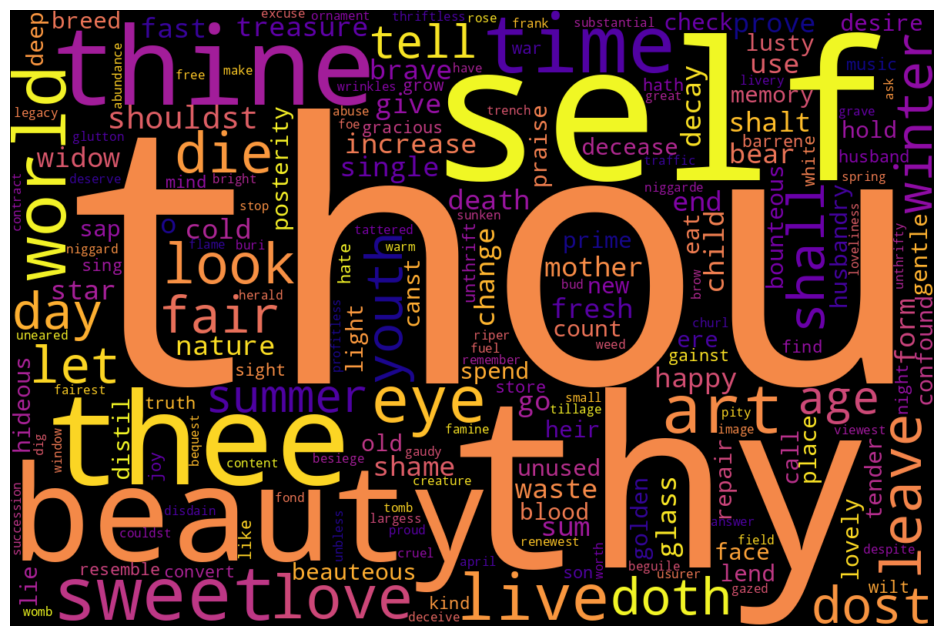

In [18]:
import spacy
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Cargar modelo de spaCy para español (descárgalo si no lo tienes)
# En consola: python -m spacy download es_core_news_sm
nlp = spacy.load("en_core_web_sm")

# Procesar el texto
doc = nlp(text)

# Filtrar: solo palabras (no signos), no stopwords, no espacios
tokens = [token.lemma_.lower() for token in doc 
          if token.is_alpha and not token.is_stop]

# Contar frecuencias
word_freq = Counter(tokens)

# Mostrar las 10 palabras más comunes
print(word_freq.most_common(10))

# --- Gráfico de barras ---
common_words = word_freq.most_common(20)
labels, counts = zip(*common_words)

plt.figure(figsize=(10,5))
plt.bar(labels, counts)
plt.title("Distribución de palabras más comunes (spaCy, lematizadas)")
plt.xticks(rotation=45)
plt.show()

# --- Nube de palabras ---
wordcloud = WordCloud(
    width=1200,
    height=800,
    background_color="black",
    colormap="plasma"
).generate_from_frequencies(word_freq)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [11]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 19.2 MB/s  0:00:00 19.0 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [19]:
import spacy
from collections import Counter
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer


# =====================================================
# 1. Distribución de palabras (frecuencias y n-gramas)
# =====================================================
tokens = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]

word_freq = Counter(tokens)
print("Palabras más comunes:", word_freq.most_common(10))

# Bigramas
bigrams = list(zip(tokens, tokens[1:]))
bigram_freq = Counter(bigrams)
print("\nBigramas más comunes:", bigram_freq.most_common(10))

# Trigramas
trigrams = list(zip(tokens, tokens[1:], tokens[2:]))
trigram_freq = Counter(trigrams)
print("\nTrigramas más comunes:", trigram_freq.most_common(10))

# =====================================================
# 2. Longitud promedio de palabras y oraciones
# =====================================================
avg_word_length = np.mean([len(token.text) for token in doc if token.is_alpha])
avg_sentence_length = np.mean([len([t for t in sent if t.is_alpha]) for sent in doc.sents])

print(f"\nLongitud promedio de palabras: {avg_word_length:.2f}")
print(f"Longitud promedio de oraciones: {avg_sentence_length:.2f} palabras")

# =====================================================
# 3. Riqueza léxica (type-token ratio)
# =====================================================
lexical_richness = len(set(tokens)) / len(tokens)
print(f"Riqueza léxica (TTR): {lexical_richness:.2f}")


Palabras más comunes: [('thou', 47), ('thy', 38), ('self', 24), ('beauty', 20), ('thee', 20), ('thine', 14), ('time', 13), ('sweet', 11), ('world', 10), ('art', 9)]

Bigramas más comunes: [(('thy', 'self'), 12), (('thou', 'art'), 7), (('thy', 'beauty'), 5), (('thou', 'shouldst'), 4), (('self', 'thy'), 3), (('self', 'love'), 3), (('dost', 'thou'), 3), (('thou', 'thy'), 3), (('thy', 'sweet'), 2), (('sweet', 'self'), 2)]

Trigramas más comunes: [(('thy', 'self', 'thy'), 3), (('thou', 'thy', 'self'), 3), (('thy', 'sweet', 'self'), 2), (('thy', 'self', 'thou'), 2), (('fairest', 'creature', 'desire'), 1), (('creature', 'desire', 'increase'), 1), (('desire', 'increase', 'beauty'), 1), (('increase', 'beauty', 'rose'), 1), (('beauty', 'rose', 'die'), 1), (('rose', 'die', 'riper'), 1)]

Longitud promedio de palabras: 4.29
Longitud promedio de oraciones: 26.65 palabras
Riqueza léxica (TTR): 0.55


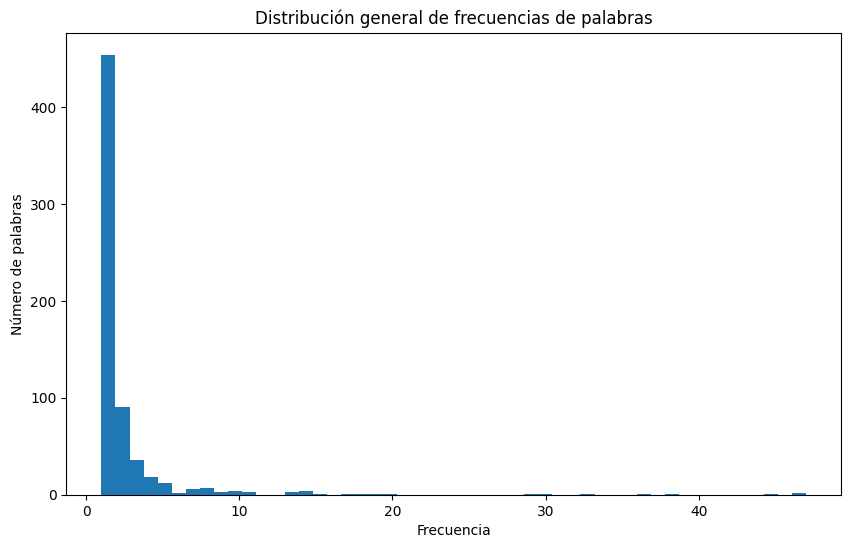

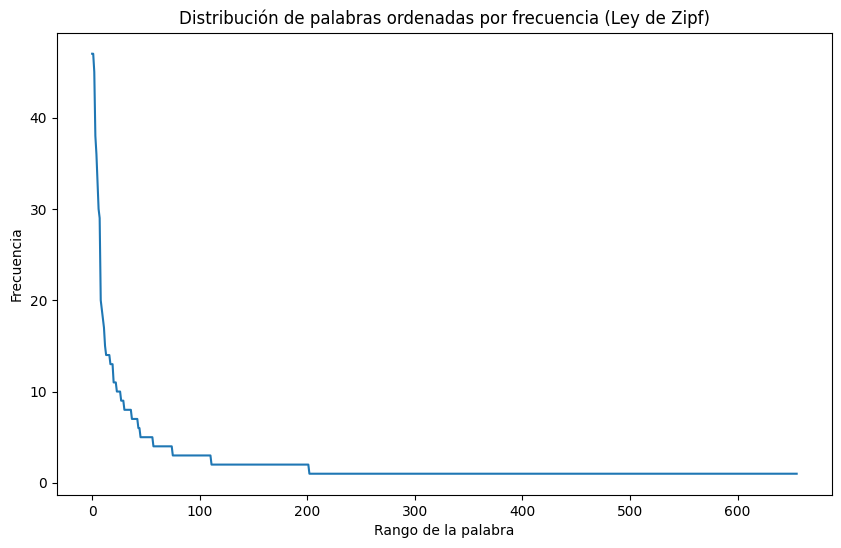

In [20]:
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Cargar modelo en español
nlp = spacy.load("es_core_news_sm")

# Procesar texto
doc = nlp(text)

# Tokens lematizados y filtrados
tokens = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]

# Contar frecuencias
word_freq = Counter(tokens)
freq_values = list(word_freq.values())

# --- Histograma de frecuencias ---
plt.figure(figsize=(10,6))
plt.hist(freq_values, bins=50)
plt.title("Distribución general de frecuencias de palabras")
plt.xlabel("Frecuencia")
plt.ylabel("Número de palabras")
plt.show()

# --- Curva de frecuencia ordenada (Zipf-like) ---
sorted_freqs = sorted(freq_values, reverse=True)
plt.figure(figsize=(10,6))
plt.plot(sorted_freqs)
plt.title("Distribución de palabras ordenadas por frecuencia (Ley de Zipf)")
plt.xlabel("Rango de la palabra")
plt.ylabel("Frecuencia")
plt.show()
